<a href="https://colab.research.google.com/github/shahrzadJavadiKoushesh/Process-Outcome-Prediction-BachelorProject/blob/main/ProcessMiningBPIC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Git Repository

In [ ]:
!wget -q https://raw.githubusercontent.com/tsunrise/colab-github/main/colab_github.py
import colab_github
colab_github.github_auth(persistent_key=True)


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
Please go to https://github.com/settings/ssh/new to upload the following key: 
ssh-ed25519 AAAAC3NzaC1lZDI1NTE5AAAAIGw64lNtNjD+dJXYjQNiF27iEuGzxAXbxhEszStsYjM3 root@1575d9f6bc52

Please use SSH method to clone repo.


In [ ]:
!git clone git@github.com:shahrzadJavadiKoushesh/Process-Outcome-Prediction-BachelorProject.git



Cloning into 'Process-Outcome-Prediction-BachelorProject'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (3/3), done.


# Reading Data



In [1]:
from google.colab import drive

drive.mount('drive')

Mounted at drive


In [ ]:
# Use ijson to read data step by step and not all at once
!pip install ijson

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 10.1 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import ijson
path = 'drive/MyDrive/ProcessMiningBachelorProject/BPIC19/BPIC19.jsonocel'
data = []

# Use ijson to read the file incrementally
with open(path, 'r') as f:
    for item in ijson.items(f, 'ocel:events'):
        data.append(item)

print(len(data))

1


In [ ]:
events_df = pd.DataFrame(data)
events_df

NameError: name 'data' is not defined

In [ ]:
print(events_df.head())

                                             1900003  \
0  {'ocel:timestamp': '1948-01-26T22:59:00', 'oce...   

                                             1900004  \
0  {'ocel:timestamp': '1948-01-26T22:59:00', 'oce...   

                                             1900005  \
0  {'ocel:timestamp': '1948-01-26T22:59:00', 'oce...   

                                             1900006  \
0  {'ocel:timestamp': '1948-01-26T22:59:00', 'oce...   

                                             1900007  \
0  {'ocel:timestamp': '1948-01-26T22:59:00', 'oce...   

                                             1900008  \
0  {'ocel:timestamp': '1948-01-26T22:59:00', 'oce...   

                                             1900009  \
0  {'ocel:timestamp': '1948-01-26T22:59:00', 'oce...   

                                             1900010  \
0  {'ocel:timestamp': '1948-01-26T22:59:00', 'oce...   

                                             1900011  \
0  {'ocel:timestamp': '1948-01-26T22:59:

In [ ]:
# Transpose the DataFrame to switch rows and columns
transposed_df = events_df.T
print(transposed_df.head())

                                                         0
1900003  {'ocel:timestamp': '1948-01-26T22:59:00', 'oce...
1900004  {'ocel:timestamp': '1948-01-26T22:59:00', 'oce...
1900005  {'ocel:timestamp': '1948-01-26T22:59:00', 'oce...
1900006  {'ocel:timestamp': '1948-01-26T22:59:00', 'oce...
1900007  {'ocel:timestamp': '1948-01-26T22:59:00', 'oce...


In [ ]:
flattened_data = []

for event_id, event_details in transposed_df.iterrows():
    event_details = event_details[0]

    # Extracting values
    timestamp = event_details['ocel:timestamp']
    activity = event_details['ocel:activity']

    # Extract nested vmap attributes
    vmap = event_details['ocel:vmap']

    # Combine all data into a single dictionary
    flattened_event = {
        'event_id': event_id,
        'timestamp': timestamp,
        'activity': activity,
        **vmap  # Unpack vmap attributes into the dictionary
    }

    flattened_data.append(flattened_event)

# Create a flattened DataFrame from the processed data
events_df = pd.DataFrame(flattened_data)

print(events_df.head())

  event_id            timestamp                   activity              ID  \
0  1900003  1948-01-26T22:59:00     Vendor creates invoice  65781719105536   
1  1900004  1948-01-26T22:59:00  Vendor creates debit memo  65777424138241   
2  1900005  1948-01-26T22:59:00     Vendor creates invoice  65777424138240   
3  1900006  1948-01-26T22:59:00     Vendor creates invoice  65794604007424   
4  1900007  1948-01-26T22:59:00  Vendor creates debit memo  65794604007425   

         cCompany     cDocType   cGR cGRbasedInvVerif               cID cItem  \
0  companyID_0000  Standard PO  True            False  4507004931_00020  20.0   
1  companyID_0000  Standard PO  True            False  4507004931_00010  10.0   
2  companyID_0000  Standard PO  True            False  4507004931_00010  10.0   
3  companyID_0000  Standard PO  True            False  4507004931_00050  50.0   
4  companyID_0000  Standard PO  True            False  4507004931_00050  50.0   

   ...         cPOID      cPurDocCat cSpendA

In [ ]:
file_path = 'drive/MyDrive/ProcessMiningBachelorProject/BPIC19/events_df.csv'
# Save the DataFrame to a CSV file
events_df.to_csv(file_path, index=False)

print(f'DataFrame saved to {file_path}')

# Pre-Processing and traning models for invoice approval prediction

In [2]:
import pandas as pd
dataset_address = 'drive/MyDrive/ProcessMiningBachelorProject/BPIC19/events_df.csv'
df = pd.read_csv(dataset_address)
df

,event_id,timestamp,activity,ID,cCompany,cDocType,cGR,cGRbasedInvVerif,cID,cItem,...,cPOID,cPurDocCat,cSpendAreaText,cSpendClassText,cSubSPendAreaText,cVendor,cVendorName,eCumNetWorth,idx,resource
0,1900003,1948-01-26T22:59:00,Vendor creates invoice,65781719105536,companyID_0000,Standard PO,True,False,4507004931_00020,20.0,...,4.507005e+09,Purchase order,Sales,NPR,Products for Resale,vendorID_0670,vendor_0645,68.0,0.0,NONE
1,1900004,1948-01-26T22:59:00,Vendor creates debit memo,65777424138241,companyID_0000,Standard PO,True,False,4507004931_00010,10.0,...,4.507005e+09,Purchase order,Sales,NPR,Products for Resale,vendorID_0670,vendor_0645,325.0,1.0,NONE
2,1900005,1948-01-26T22:59:00,Vendor creates invoice,65777424138240,companyID_0000,Standard PO,True,False,4507004931_00010,10.0,...,4.507005e+09,Purchase order,Sales,NPR,Products for Resale,vendorID_0670,vendor_0645,325.0,2.0,NONE
3,1900006,1948-01-26T22:59:00,Vendor creates invoice,65794604007424,companyID_0000,Standard PO,True,False,4507004931_00050,50.0,...,4.507005e+09,Purchase order,Sales,NPR,Products for Resale,vendorID_0670,vendor_0645,102.0,3.0,NONE
4,1900007,1948-01-26T22:59:00,Vendor creates debit memo,65794604007425,companyID_0000,Standard PO,True,False,4507004931_00050,50.0,...,4.507005e+09,Purchase order,Sales,NPR,Products for Resale,vendorID_0670,vendor_0645,102.0,4.0,NONE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595918,321909,2019-10-03T22:59:00,Vendor creates invoice,798129477648394,companyID_0000,Standard PO,True,False,4508055808_00020,20.0,...,4.508056e+09,Purchase order,Additives,PR,Neutralisation Agents,vendorID_0440,vendor_0427,2249.0,1595918.0,NONE
1595919,321910,2019-12-05T22:59:00,Vendor creates invoice,1009386034036740,companyID_0000,Standard PO,True,True,4508071281_00010,10.0,...,4.508071e+09,Purchase order,Others,OTHER,Customers,vendorID_0158,vendor_0156,362.0,1595919.0,NONE
1595920,321911,2019-12-05T22:59:00,Vendor creates invoice,1009441868611588,companyID_0000,Standard PO,True,False,4508071281_00140,140.0,...,4.508071e+09,Purchase order,Others,OTHER,Customers,vendorID_0158,vendor_0156,250.0,1595920.0,NONE
1595921,321912,2020-04-06T22:59:00,Vendor creates invoice,273679611068428,companyID_0000,Standard PO,True,True,4507019322_00010,10.0,...,4.507019e+09,Purchase order,Latex & Monomers,PR,Vinyl Acrylics,vendorID_0183,vendor_0181,40904.0,1595921.0,NONE


Data Cleaning:

In [3]:
import pandas as pd
import numpy as np
def clean_data(df):
    # handle missing values
    print("Initial missing values:", df.isnull().sum())

    # Dropping rows with missing crucial columns for invoice approval
    # cGR -> whether a goods receipt is required for the purchase order item
    # cGRbasedInvVerif -> whether invoice verification is based on the goods receipt
    # cItem -> the monetary value associated with each line item in the purchase order
    df = df.dropna(subset=['cGR', 'cGRbasedInvVerif', 'cItem'])

    # Report the cleaned missing values
    print("Missing values after cleaning:", df.isnull().sum())

    # outliers in 'cItem'
    lower_bound = df['cItem'].quantile(0.01)
    upper_bound = df['cItem'].quantile(0.99)
    df = df[(df['cItem'] >= lower_bound) & (df['cItem'] <= upper_bound)]

    return df

events_df_cleaned = clean_data(df)
events_df_cleaned

Initial missing values: event_id                 0
timestamp                0
activity                 0
ID                       0
cCompany                 0
cDocType                 0
cGR                      0
cGRbasedInvVerif         0
cID                      0
cItem                    0
cItemCat                 0
cItemType                0
cPOID                    0
cPurDocCat               0
cSpendAreaText       16294
cSpendClassText      16294
cSubSPendAreaText    16294
cVendor                  0
cVendorName              0
eCumNetWorth             0
idx                      0
resource                 0
dtype: int64
Missing values after cleaning: event_id                 0
timestamp                0
activity                 0
ID                       0
cCompany                 0
cDocType                 0
cGR                      0
cGRbasedInvVerif         0
cID                      0
cItem                    0
cItemCat                 0
cItemType                0
cPOID         

,event_id,timestamp,activity,ID,cCompany,cDocType,cGR,cGRbasedInvVerif,cID,cItem,...,cPOID,cPurDocCat,cSpendAreaText,cSpendClassText,cSubSPendAreaText,cVendor,cVendorName,eCumNetWorth,idx,resource
0,1900003,1948-01-26T22:59:00,Vendor creates invoice,65781719105536,companyID_0000,Standard PO,True,False,4507004931_00020,20.0,...,4.507005e+09,Purchase order,Sales,NPR,Products for Resale,vendorID_0670,vendor_0645,68.0,0.0,NONE
1,1900004,1948-01-26T22:59:00,Vendor creates debit memo,65777424138241,companyID_0000,Standard PO,True,False,4507004931_00010,10.0,...,4.507005e+09,Purchase order,Sales,NPR,Products for Resale,vendorID_0670,vendor_0645,325.0,1.0,NONE
2,1900005,1948-01-26T22:59:00,Vendor creates invoice,65777424138240,companyID_0000,Standard PO,True,False,4507004931_00010,10.0,...,4.507005e+09,Purchase order,Sales,NPR,Products for Resale,vendorID_0670,vendor_0645,325.0,2.0,NONE
3,1900006,1948-01-26T22:59:00,Vendor creates invoice,65794604007424,companyID_0000,Standard PO,True,False,4507004931_00050,50.0,...,4.507005e+09,Purchase order,Sales,NPR,Products for Resale,vendorID_0670,vendor_0645,102.0,3.0,NONE
4,1900007,1948-01-26T22:59:00,Vendor creates debit memo,65794604007425,companyID_0000,Standard PO,True,False,4507004931_00050,50.0,...,4.507005e+09,Purchase order,Sales,NPR,Products for Resale,vendorID_0670,vendor_0645,102.0,4.0,NONE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595918,321909,2019-10-03T22:59:00,Vendor creates invoice,798129477648394,companyID_0000,Standard PO,True,False,4508055808_00020,20.0,...,4.508056e+09,Purchase order,Additives,PR,Neutralisation Agents,vendorID_0440,vendor_0427,2249.0,1595918.0,NONE
1595919,321910,2019-12-05T22:59:00,Vendor creates invoice,1009386034036740,companyID_0000,Standard PO,True,True,4508071281_00010,10.0,...,4.508071e+09,Purchase order,Others,OTHER,Customers,vendorID_0158,vendor_0156,362.0,1595919.0,NONE
1595920,321911,2019-12-05T22:59:00,Vendor creates invoice,1009441868611588,companyID_0000,Standard PO,True,False,4508071281_00140,140.0,...,4.508071e+09,Purchase order,Others,OTHER,Customers,vendorID_0158,vendor_0156,250.0,1595920.0,NONE
1595921,321912,2020-04-06T22:59:00,Vendor creates invoice,273679611068428,companyID_0000,Standard PO,True,True,4507019322_00010,10.0,...,4.507019e+09,Purchase order,Latex & Monomers,PR,Vinyl Acrylics,vendorID_0183,vendor_0181,40904.0,1595921.0,NONE


Feature Engineering

In [4]:
def feature_engineering(df):
    df['cGR'] = df['cGR'].astype(int)
    df['cGRbasedInvVerif'] = df['cGRbasedInvVerif'].astype(int)

    # Create new features based on existing data
    df['cItem_log'] = np.log1p(df['cItem'])  # Log transformation of item value
    df['activity_count'] = df.groupby('activity')['activity'].transform('count')  # Count of activity occurrences

    # encoding categorical variables
    df = pd.get_dummies(df, columns=['activity', 'cItemCat'], drop_first=True)  # One-hot encode activity column

    return df

events_df_features = feature_engineering(events_df_cleaned)
events_df_features

,event_id,timestamp,ID,cCompany,cDocType,cGR,cGRbasedInvVerif,cID,cItem,cItemType,...,activity_SRM: Ordered,activity_SRM: Transaction Completed,activity_SRM: Transfer Failed (E.Sys.),activity_Set Payment Block,activity_Update Order Confirmation,activity_Vendor creates debit memo,activity_Vendor creates invoice,"cItemCat_3-way match, invoice after GR","cItemCat_3-way match, invoice before GR",cItemCat_Consignment
0,1900003,1948-01-26T22:59:00,65781719105536,companyID_0000,Standard PO,1,0,4507004931_00020,20.0,Standard,...,False,False,False,False,False,False,True,False,True,False
1,1900004,1948-01-26T22:59:00,65777424138241,companyID_0000,Standard PO,1,0,4507004931_00010,10.0,Standard,...,False,False,False,False,False,True,False,False,True,False
2,1900005,1948-01-26T22:59:00,65777424138240,companyID_0000,Standard PO,1,0,4507004931_00010,10.0,Standard,...,False,False,False,False,False,False,True,False,True,False
3,1900006,1948-01-26T22:59:00,65794604007424,companyID_0000,Standard PO,1,0,4507004931_00050,50.0,Standard,...,False,False,False,False,False,False,True,False,True,False
4,1900007,1948-01-26T22:59:00,65794604007425,companyID_0000,Standard PO,1,0,4507004931_00050,50.0,Standard,...,False,False,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595918,321909,2019-10-03T22:59:00,798129477648394,companyID_0000,Standard PO,1,0,4508055808_00020,20.0,Standard,...,False,False,False,False,False,False,True,False,True,False
1595919,321910,2019-12-05T22:59:00,1009386034036740,companyID_0000,Standard PO,1,1,4508071281_00010,10.0,Standard,...,False,False,False,False,False,False,True,True,False,False
1595920,321911,2019-12-05T22:59:00,1009441868611588,companyID_0000,Standard PO,1,0,4508071281_00140,140.0,Standard,...,False,False,False,False,False,False,True,False,True,False
1595921,321912,2020-04-06T22:59:00,273679611068428,companyID_0000,Standard PO,1,1,4507019322_00010,10.0,Standard,...,False,False,False,False,False,False,True,True,False,False


In [5]:
events_df_features.columns

Index(['event_id', 'timestamp', 'ID', 'cCompany', 'cDocType', 'cGR',
       'cGRbasedInvVerif', 'cID', 'cItem', 'cItemType', 'cPOID', 'cPurDocCat',
       'cSpendAreaText', 'cSpendClassText', 'cSubSPendAreaText', 'cVendor',
       'cVendorName', 'eCumNetWorth', 'idx', 'resource', 'cItem_log',
       'activity_count', 'activity_Cancel Goods Receipt',
       'activity_Cancel Invoice Receipt', 'activity_Cancel Subsequent Invoice',
       'activity_Change Approval for Purchase Order',
       'activity_Change Currency', 'activity_Change Delivery Indicator',
       'activity_Change Final Invoice Indicator', 'activity_Change Price',
       'activity_Change Quantity', 'activity_Change Rejection Indicator',
       'activity_Change Storage Location', 'activity_Change payment term',
       'activity_Clear Invoice', 'activity_Create Purchase Order Item',
       'activity_Create Purchase Requisition Item',
       'activity_Delete Purchase Order Item',
       'activity_Reactivate Purchase Order Item

Preprocessing

In [6]:
import pandas as pd
def preprocess_data(df):
    # Convert timestamp to datetime and extract features
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    df['year'] = df['timestamp'].dt.year
    df['month'] = df['timestamp'].dt.month
    df['day'] = df['timestamp'].dt.day
    df['hour'] = df['timestamp'].dt.hour

    # Drop original timestamp column
    df = df.drop('timestamp', axis=1)
    return df
events_df_features = preprocess_data(events_df_features)
events_df_features.columns

Index(['event_id', 'ID', 'cCompany', 'cDocType', 'cGR', 'cGRbasedInvVerif',
       'cID', 'cItem', 'cItemType', 'cPOID', 'cPurDocCat', 'cSpendAreaText',
       'cSpendClassText', 'cSubSPendAreaText', 'cVendor', 'cVendorName',
       'eCumNetWorth', 'idx', 'resource', 'cItem_log', 'activity_count',
       'activity_Cancel Goods Receipt', 'activity_Cancel Invoice Receipt',
       'activity_Cancel Subsequent Invoice',
       'activity_Change Approval for Purchase Order',
       'activity_Change Currency', 'activity_Change Delivery Indicator',
       'activity_Change Final Invoice Indicator', 'activity_Change Price',
       'activity_Change Quantity', 'activity_Change Rejection Indicator',
       'activity_Change Storage Location', 'activity_Change payment term',
       'activity_Clear Invoice', 'activity_Create Purchase Order Item',
       'activity_Create Purchase Requisition Item',
       'activity_Delete Purchase Order Item',
       'activity_Reactivate Purchase Order Item',
       'ac

In [7]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

def create_preprocessor(df):
    # Identify categorical and numerical columns
    categorical_columns = ['cVendor']
    numerical_columns = ['cItem', 'year', 'month', 'day', 'hour']

    # Create preprocessing pipeline
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numerical_columns),
            ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)
        ]
    )
    return preprocessor
preprocessor = create_preprocessor(events_df_features)
X_transformed = preprocessor.fit_transform(events_df_features)


## Prepare data for model training

In [8]:
from sklearn.model_selection import train_test_split

X = X_transformed  # Transformed features
y = events_df_features['cGR']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [9]:
print("y_train value counts:")
print(y_train.value_counts())

print("y_test value counts:")
print(y_test.value_counts())

y_train value counts:
cGR
1    944589
0      3504
Name: count, dtype: int64
y_test value counts:
cGR
1    629668
0      2394
Name: count, dtype: int64


Model Training - Logistic Regression

In [10]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, roc_auc_score

model = LogisticRegression(max_iter=500, class_weight='balanced', random_state=42)

# Use StratifiedKFold to maintain class proportions in each fold
cv = StratifiedKFold(n_splits=7, shuffle=True, random_state=42)

roc_auc_scorer = make_scorer(roc_auc_score)

cv_scores = cross_val_score(model, X, y, cv=cv, scoring=roc_auc_scorer)

print(f"Cross-Validation ROC-AUC Scores: {cv_scores}")
print(f"Mean ROC-AUC Score: {cv_scores.mean():.4f}")


Cross-Validation ROC-AUC Scores: [1.         0.99762752 1.         0.99881235 1.         1.
 0.99881376]
Mean ROC-AUC Score: 0.9993


In [11]:
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

# Predict classes on the test set
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)
y_test_proba = model.predict_proba(X_test)[:, 1]

test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy}")

# Generate classification report
print("Classification Report on Test Set:")
print(classification_report(y_test, y_test_pred))

# Calculate ROC-AUC score
test_roc_auc = roc_auc_score(y_test, y_test_proba)
print(f"Test ROC-AUC Score: {test_roc_auc}")


Test Accuracy: 0.9999636111647275
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      2394
           1       1.00      1.00      1.00    629668

    accuracy                           1.00    632062
   macro avg       1.00      1.00      1.00    632062
weighted avg       1.00      1.00      1.00    632062

Test ROC-AUC Score: 0.9999943214429178


Confusion Matrix - Logistic Regression

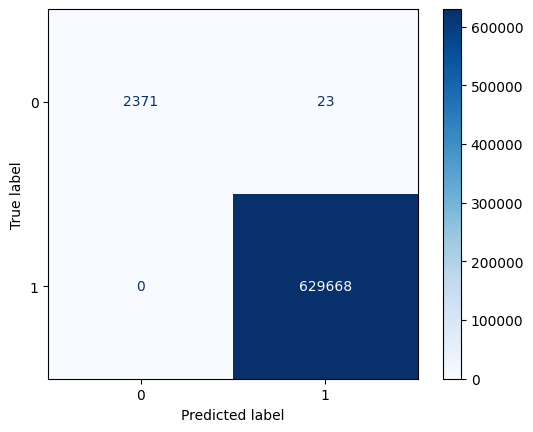

In [12]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

conf_matrix = confusion_matrix(y_test, y_test_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_)
disp.plot(cmap='Blues', values_format='d')

import matplotlib.pyplot as plt
plt.show()


Model Training - RF

In [13]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Balance the dataset
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Train the Random Forest
model = RandomForestClassifier(
    class_weight='balanced',
    random_state=42,
    n_estimators=50,
    max_depth=10,        # Limit tree depth
    max_features='sqrt'
    )
model.fit(X_train_balanced, y_train_balanced)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate performance
print("Random Forest")
print(classification_report(y_test, y_pred))
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
print(f"ROC-AUC Score: {roc_auc}")


Random Forest
              precision    recall  f1-score   support

           0       0.02      0.84      0.05      2394
           1       1.00      0.87      0.93    629668

    accuracy                           0.87    632062
   macro avg       0.51      0.85      0.49    632062
weighted avg       1.00      0.87      0.93    632062

ROC-AUC Score: 0.9317019689956195


Confusion Matrix - Random Forest

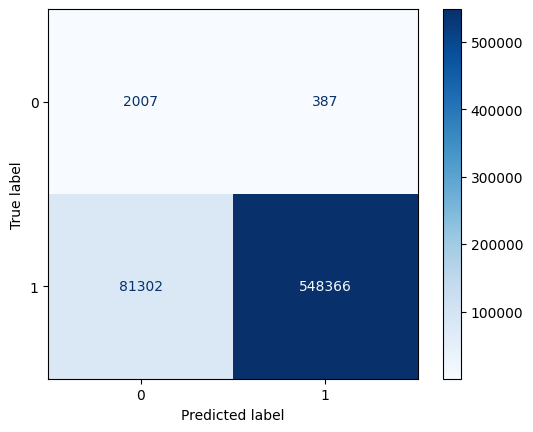

In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

conf_matrix = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_)
disp.plot(cmap='Blues', values_format='d')

import matplotlib.pyplot as plt
plt.show()

Model Training - Gradient Boosting Classifier

In [15]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.utils.class_weight import compute_sample_weight


sample_weights = compute_sample_weight({0: 10, 1: 1}, y_train)


model = GradientBoostingClassifier(
    n_estimators=50,  # Reduce the number of trees
    max_depth=2,      # Shallow trees
    learning_rate=0.2, # Faster learning rate
    subsample=0.8,    # Use 80% of data for each tree
    random_state=42
)

model.fit(X_train, y_train, sample_weight=sample_weights)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Gradient Boosting: {accuracy}")
print(classification_report(y_test, y_pred))

# Compute ROC-AUC Score (for binary classification)
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
print(f"ROC-AUC Score: {roc_auc}")


Accuracy of Gradient Boosting: 0.9990475617898245
              precision    recall  f1-score   support

           0       1.00      0.75      0.86      2394
           1       1.00      1.00      1.00    629668

    accuracy                           1.00    632062
   macro avg       1.00      0.87      0.93    632062
weighted avg       1.00      1.00      1.00    632062

ROC-AUC Score: 0.9045981274804117


Confusion Matrix - Gradient Boosting

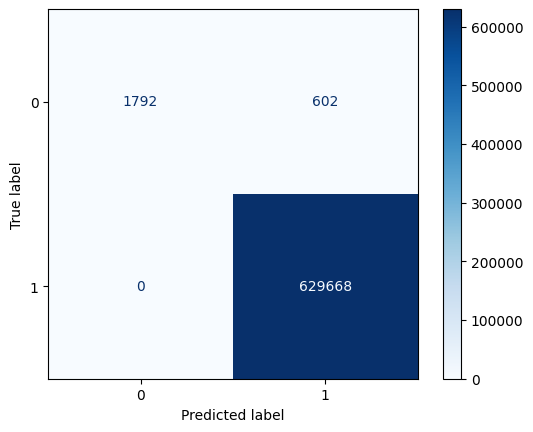

In [16]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

conf_matrix = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_)
disp.plot(cmap='Blues', values_format='d')

import matplotlib.pyplot as plt
plt.show()

Most Frequent Value

In [20]:
# majority class
most_frequent_value = y_train.value_counts().idxmax()
print(f"Most Frequent Value (Majority Class): {most_frequent_value}")


Most Frequent Value (Majority Class): 1


In [21]:
# Generate predictions based on the majority class
y_test_pred_baseline = [most_frequent_value] * len(y_test)

In [22]:
from sklearn.metrics import accuracy_score

baseline_accuracy = accuracy_score(y_test, y_test_pred_baseline)
print(f"Baseline Accuracy: {baseline_accuracy}")

Baseline Accuracy: 0.9962123968851156


In [23]:
from sklearn.metrics import classification_report

print("Baseline Classification Report:")
print(classification_report(y_test, y_test_pred_baseline))

Baseline Classification Report:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2394
           1       1.00      1.00      1.00    629668

    accuracy                           1.00    632062
   macro avg       0.50      0.50      0.50    632062
weighted avg       0.99      1.00      0.99    632062



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


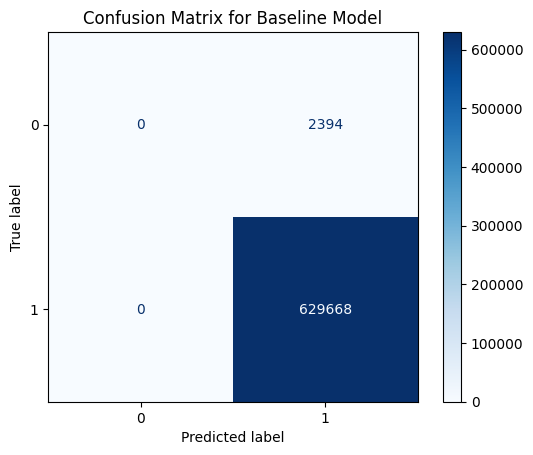

In [25]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm_baseline = confusion_matrix(y_test, y_test_pred_baseline)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_baseline, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)

plt.title("Confusion Matrix for Baseline Model")
plt.show()
